## 202131027_Irham Ahmad Rozan

## Import Library

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray

## Show Image

In [4]:
pict1 = imread(fname = 'noisy.jfif')
pict2 = imread(fname = 'dog.jfif')

pict1 = cv.cvtColor(pict1, cv.COLOR_RGB2GRAY)
pict2 = cv.cvtColor(pict2, cv.COLOR_RGB2GRAY)

print("shape pict 1 : 0", pict1.shape)
print("shape pict 2 : 0", pict2.shape)

fig,axes = plt.subplots(1,2,figsize=(10,10))
ax= axes.ravel()

ax[0].imshow(pict1, cmap = 'gray')
ax[0].set_title('pict 1')
ax[1].imshow(pict2, cmap = 'gray')
ax[1].set_title('pict 2')

shape pict 1 : 0 (228, 221)
shape pict 2 : 0 (213, 236)


Text(0.5, 1.0, 'pict 2')

## Copy of Image

In [5]:
copypict1 = pict1.copy().astype(float)
copypict2 = pict2.copy().astype(float)

m1,n1 = copypict1.shape
ouput1 = np.empty([m1,n1])

m2,n2 = copypict2.shape
ouput2 = np.empty([m2,n2])

print('shape copy pict 1 : ',copypict1.shape)
print('shape copy pict 1 : ',copypict1.shape)

print('m1', m1)
print('n1', n1)


print('shape copy pict 2 : ',copypict2.shape)
print('shape copy pict 2 : ',copypict2.shape)

print('m2', m2)
print('n2', n2)

shape copy pict 1 :  (228, 221)
shape copy pict 1 :  (228, 221)
m1 228
n1 221
shape copy pict 2 :  (213, 236)
shape copy pict 2 :  (213, 236)
m2 213
n2 236


## Mean Filtering

In [6]:
def mean_filter(image):
    copy_image = image.copy().astype(float)
    m,n = copy_image.shape
    output = np.empty_like(copy_image)
    
    for row in range (1, m-1):
        for col in range (1, n-1):
            total = copy_image[row-1, col-1] + copy_image[row-1, col+1] + \
                    copy_image[row, col-1] + copy_image[row, col] + copy_image[row, col+1] + \
                    copy_image[row+1, col-1] + copy_image[row+1, col] + copy_image[row+1, col+1]
            output[row, col] = total / 9
        return output

In [7]:
filtered_image1 = mean_filter(copypict1)
filtered_image2 = mean_filter(copypict2)

fig,axes = plt.subplots(2,2,figsize=(10,10))
ax= axes.ravel()

ax[0].imshow(pict1, cmap = 'gray')
ax[0].set_title('pict 1')

ax[1].imshow(filtered_image1, cmap = 'gray')
ax[1].set_title('pict 2')

ax[2].imshow(pict2, cmap = 'gray')
ax[2].set_title('pict 1')

ax[3].imshow(filtered_image2, cmap = 'gray')
ax[3].set_title('pict 2')

plt.tight_layout()

## Median Filtering

In [8]:
img_median = cv.imread('noisy.jfif')
img_median = cv.cvtColor(img_median, cv.COLOR_BGR2RGB)
img_median_after = cv.medianBlur(img_median, 3)

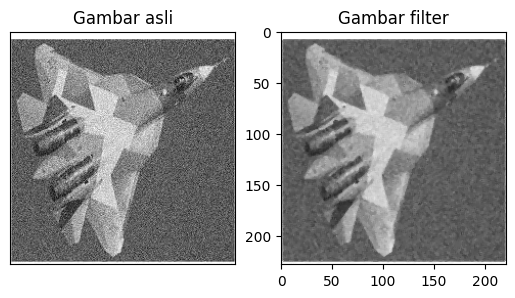

In [9]:
plt.subplot(121), plt.imshow(img_median), plt.title('Gambar asli')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_median_after), plt.title('Gambar filter')

plt.show()

## Edge Filtering

In [10]:
def filter_batas (data, filter_size):
    temp = []
    indexer = filter_size
    new_image = data.copy()
    nrow, ncol = data.shape
    
    for i in range(nrow):
        for j in range(ncol):
            for k in range(i-indexer, i+indexer+1):
                for m in range(j-indexer, j+indexer+1):
                    if (m > -1) and (m < ncol):
                        temp.append(data[k, m])
            temp.remove(data[i, j])
            max_value = max(temp)
            min_value = min(temp)
            if data[i, j] > max_value:
                new_image[i, j] = max_value
            elif data[i, j] < min_value:
                new_image[i, j] = min_value
            temp = []
        return new_image.copy()

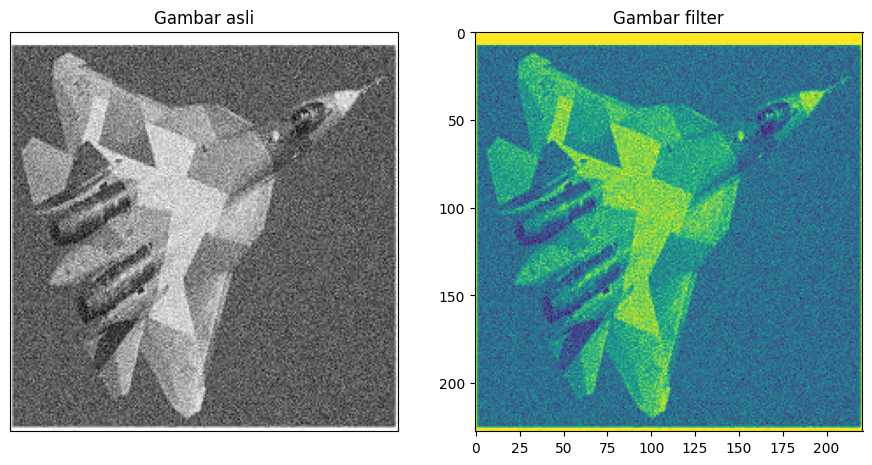

In [11]:
img_batas = cv.imread('noisy.jfif')
img_batas_grey = cv.cvtColor(img_batas, cv.COLOR_BGR2GRAY)
img_filter_batas = filter_batas(img_batas_grey, 9)

plt.figure(figsize = (11, 6))
plt.subplot(121), plt.imshow(img_batas), plt.title('Gambar asli')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_filter_batas), plt.title('Gambar filter')

plt.show()